# MNIST Classification with Sklearn

Importing the libraries and the datasets

In [150]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import plot_roc_curve 
from sklearn.metrics import plot_precision_recall_curve 
from sklearn.metrics import plot_confusion_matrix
from sklearn.multiclass import OneVsOneClassifier

%matplotlib inline

We are going to import the dataset, the classical MNIST set with handwritten digits between 0 and 9, from the sklearn datasets libraries. Also we are going to call DESCR method to see info about the dataset 

In [3]:
mnist = fetch_openml('mnist_784', version = 1)

mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

Now we are going to define the X (features) and the y (target), and see with the shape method the number of featured (predictor variables) and the number os instances that we have for doing the train and the test.

In [4]:
X, y = mnist.data, mnist.target

print(' X --> Instances, columns = ', X.shape, '\n', 'y --> Columns = ', y.shape)

 X --> Instances, columns =  (70000, 784) 
 y --> Columns =  (70000,)


The features represent 784 pixels, which are binary values depending on whether they are filled (1) or empty (0), so they are numeric (float) being a discrete variable. However the target variable is not a numerical variable, which is the type that most sklearn algorithms need to perform so we must transform the y in it.

In [5]:
print('y before transformation --> ', y.dtype)

y = y.astype('float')

print('y after transformation --> ', y.dtype)

y before transformation -->  object
y after transformation -->  float64


Now we are going to divide the instance in training and test set:

In [6]:
X_train, X_test, y_train, y_test = X[0:60000], X[60000:], y[:60000], y[60000:] # 60000 instances for traininig and the rest, 10000 for testing.

To see if the labels are balanced, which is fundamental to perform Machine learning tasks, we are going to plot the labels:

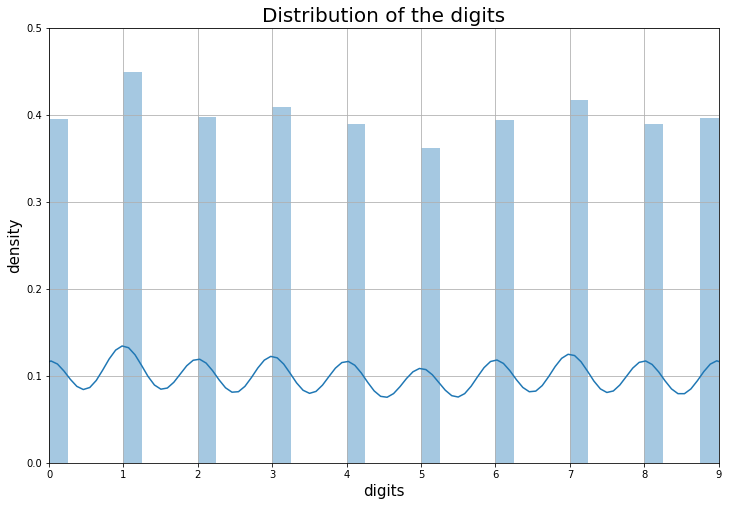

In [75]:
fig, ax = fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(y_train)
plt.axis([0, 9, 0, 0.5])
plt.title('Distribution of the digits', fontsize=20)
plt.xlabel('digits',fontsize=15)
plt.ylabel('density', fontsize=15)
plt.grid(True)

The labels are balanced.

## Binary classifier

First we are going to train a binary classifier for detecting if the target number is a 7 or not, so we are going to change the float values of the y for booleans ('True' if y is equel 7, 'False' if is othe digit). For this purpouse we are going to choose a stochastic gradient descent classifier, because, if well perform a little bit worst that a regular gradient descent algorithm it suits better with big datasets like MNIST:

In [7]:
y_train7 = (y_train == 7) 
y_test7 = (y_test == 7)

In [8]:
sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train7)

SGDClassifier()

Now that we have our binary classifier trained, lets see how perform launching the 'score' method:

In [9]:
sgd_clf.score(X_test, y_test7) # AS we can see the algorithm detects pretty well if the class is a 7 or another number.

0.9825

Despite, as we have just seen, the classifier identifies the 7 with great precision, we are going to see a series of performance measures that can be applied to gain insights in other classifiers:

CROSS VALIDATION

In [10]:
cross_val_scores = cross_val_score(sgd_clf, X_train, y_train7, cv=6) # it comes from sklearn.model_selection import cross_val_score. 'cv' parameter are the value for the folds or minibatches that cross validation method splits the dataset to train apart one from the others, and launch predictions over the other folds to get the scores and see how the algorithm generalizes.

cross_val_scores 

array([0.9809, 0.9675, 0.9808, 0.9767, 0.9785, 0.9789])

As we can see above we can trust in our classifier for the scores obtained in cross validation.

CONFUSION MATRIX

In [11]:
y_pred_sgd = sgd_clf.predict(X_test) # First to call confusion matrix method we must get the predicted values from our target test set by our fitted classifier

confusion_matrix(y_test7, y_pred_sgd)

array([[8909,   63],
       [ 112,  916]])

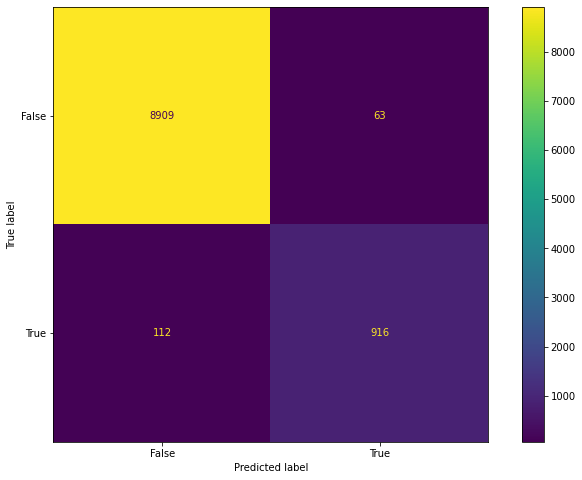

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(sgd_clf, X_test, y_test7, ax=ax)

The confusion matrix give us in a raw way how performs our classifier; it give us the 'true negatives' (it's the negative class, the number that aren't 7, that are well identified), the 'false positives' (number that are identified as positive class, digits that are 7, but they aren't), the 'false negatives' (digits that the classifier identifies as negative class but they really are 7) and the trupe positives (digits that classifier identifies as 7 and they really are). In conclussion we can say the confusion matrix give us a general way about how performs the classifier.

PRECISSION, RECALL AND F1 SCORE

Confusion matrix, as we said before, give us a general vision about the performance of the algorithm but the really interest thing of CM is that we can get more precission metrics about the performig.

In [12]:
precision_score(y_test7, y_pred_sgd) # precission is, between all the posives instances that our classifier identifies, the percentage that they really are.

0.9356486210418795

In [13]:
recall_score(y_test7, y_pred_sgd) # recall is the ratio of positive instances that are correctly detected by our algorithm between all the instances of our dataset.

0.8910505836575876

In [14]:
f1_score(y_test7, y_pred_sgd) # It's a metric that it's going to be a high score if the precission and recall have similar scores; so we use it if we want that our classifier be balanced in precission and recall terms. So for the score of the f1 we know that our precission and recall are very balanced, but it's more 

0.9128051818634778

We can not modify directly the precission or recall of our algorithms but  attending how the classifiers works, they give each instance a score through the decision function and in turn establish a threshold in which if the score obtained by the instance is greater than the threshold, the algorithm identifies the instance as a positive class and negative if not the score does not reach the threshold.

But sklearn allow us get the decission function, and use any trehold that we want (making a boolean) to make predictions based on that threshold, but I must research hoe do it properly... (To be continued)

One important thing about precission and recall metrics are that there is an inherent trade-off between the: If you want to increase the precission the recall is going to decrease and viceversa. To get insights about this we are going to get some visualizations of the data:

PRECISION/RECALL TRADE-OFF

Let's visualize the precision/recall trade-off; if you want to increase the precision the threshold decreases and viceversa.

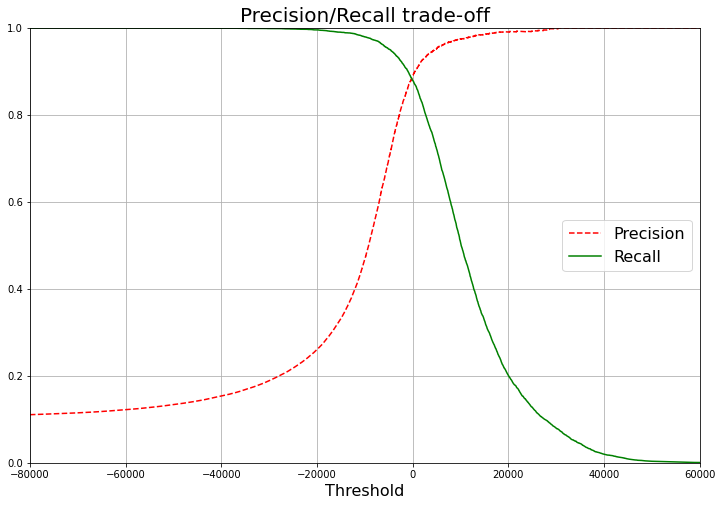

In [180]:
precisions, recalls, thresholds = precision_recall_curve(y_train7, y_scores)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=[12,8])
plt.plot(thresholds, precisions[:-1], 'r--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.legend(loc="center right", fontsize=16)
plt.xlabel("Threshold", fontsize=16)
plt.title('Precision/Recall trade-off', fontsize=20)
plt.axis([-80000, 60000, 0, 1]) 
plt.grid(True)

PRECISION VS RECALL

 Other way to visualize the precision-recall trade-off is plot directly the precision against the recall.

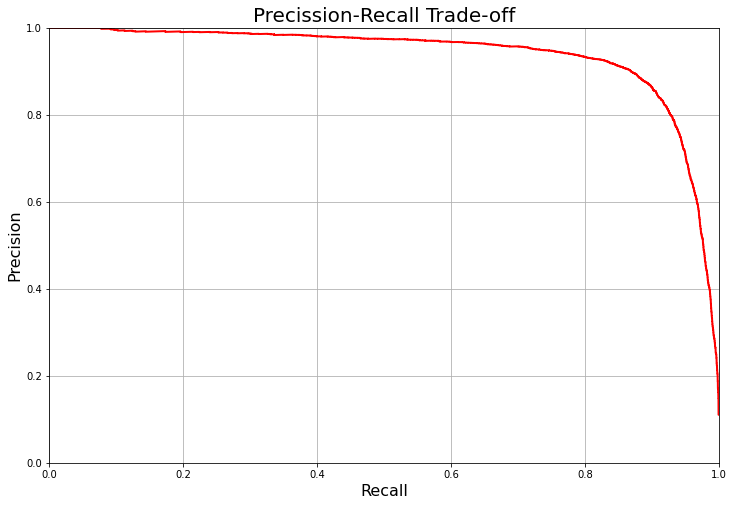

In [95]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train7, cv=3, method="decision_function") # other way to making predictions, with the same algoritm, SGD, with the cross-validation way splitting and training separately in three folds the dataset. 

# FIGURE PARAMS

plt.figure(figsize=[12,8])

plt.plot(recalls, precisions, "r-", linewidth=2)

plt.title('Precission-Recall Trade-off', fontsize=20)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.grid(axis='both')

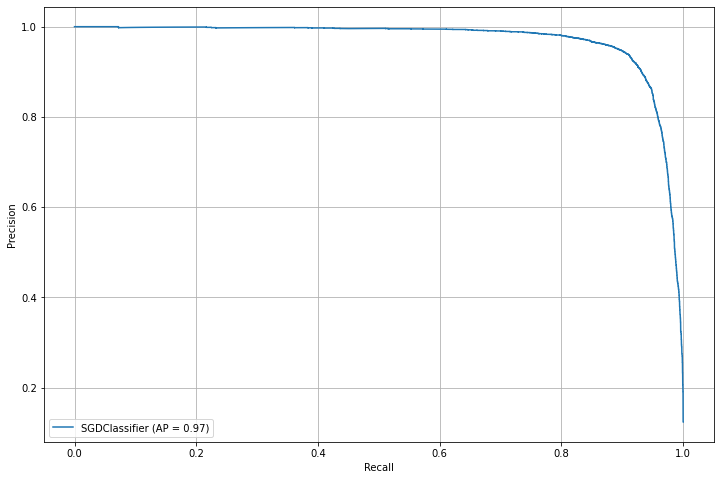

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
plot_precision_recall_curve(sgd_clf, X_train, y_train7, ax=ax) # Visualization method simpler to doing from Sklearn
plt.grid(True)

In the graph from above we can clearly see around the 0,95 for both precision and recall they decreases dramatically.

RECEIVER OPERATING CHARACTERISTIC CURVE



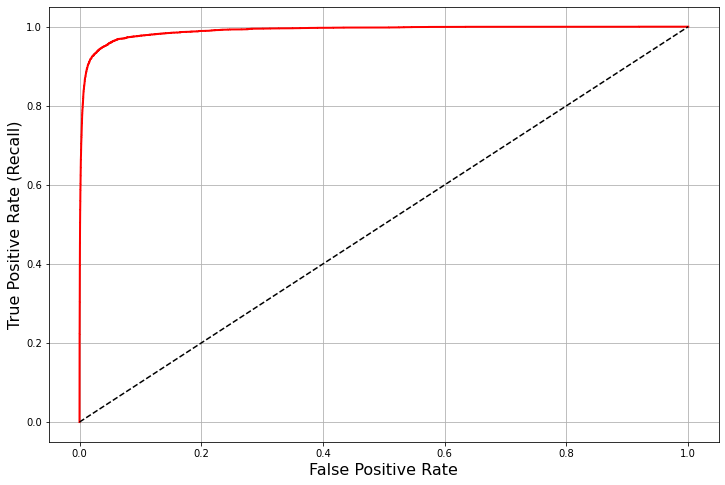

In [94]:
fpr, tpr, thresholds = roc_curve(y_train7, y_scores)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, 'r-', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True) 

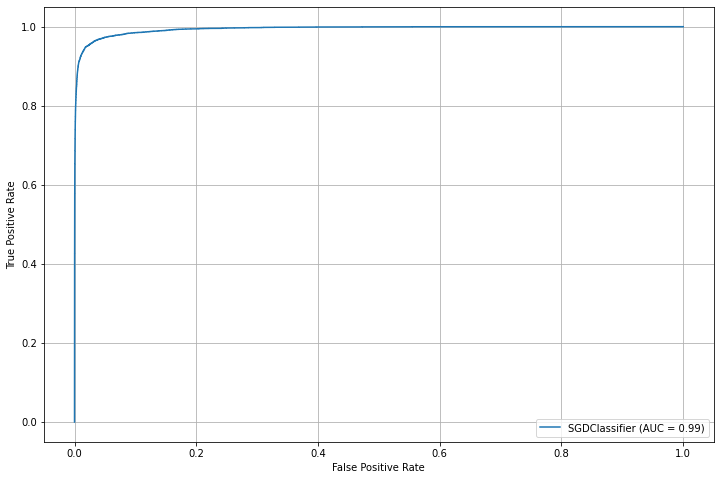

In [96]:
fig, ax = plt.subplots(figsize=(12,8))
plot_roc_curve(sgd_clf, X_train, y_train7, ax=ax) # Visualization method simpler to doing from Sklearn
plt.grid(True)

## Multiclass Classification

Some algoritms like Naive-Bayes classifiers, Logistic Regression classifiers o Random Forest classifiers performs natively multiclass classification, but the clasificator that we are handle, Srochastic Gradient Descent classifier natively only performs for binary claasification. But we can transform binary classifiers to perform multiclass classification trough 2 ways: OneVsOne (OVO) strategy or OneVsRest strategy (OVR).

That we have done previously it's train a classifier to to distinguish one class, digit 7, fromm the rest. If we train a classifier for distinguis every digit from the rest we get an OVR strategy for classifing but if we train a classifier to distinguish a digit for only other one, and repeat till we have train all the digits in this way against every other single digit, we get a OVO strategy.

When you use a binary classification algorithm for a multiclass task, Sklearn runs automatically one of this strategy depending on the algotitm. With our SGD classifier, Sklearn performs natively OVR tasks:

In [129]:
sgd_clf.classes_ # Let's see how many classes identify the algoritm

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [114]:
sgd_clf.fit(X_train, y_train)

sgd_clf.predict(X_test.reshape(len(X_test),-1))

array([7., 2., 1., ..., 4., 5., 6.])

As we can see above if we ask to the algoritm to make the prediction with the y_test set, this is going to perform it doing the multiclass task. To see it clearly, we are going to take a predicition for a single instance, and later perform the decission function to see the scores for every digit:

In [124]:
sgd_clf.predict([X_test[489]])

array([1.])

In [123]:
sgd_clf.decision_function([X_test[489]])

array([[-27282.91201024,   6019.37709928,   -285.94300454,
         -2323.44158961,  -7817.67544052,  -5810.42753277,
         -8278.24865866,  -9384.04782531,  -4015.95218298,
         -5417.88318437]])

In [128]:
y_test[489]

1.0

The digit predicted for the 490 element in the X_test set is 1, and looking for the score of the 1 in tge decission function is the highest in the array, and by the way is the same that that the y_test set :-)

Now, we are going to perform a OVO method (the training is slower than OVR because must train more classifiers) and see how performs and what differences can we appreciate:

In [134]:
sgd_ovo = OneVsOneClassifier(sgd_clf)

sgd_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier())

In [139]:
print(' OVR strategy --> ', sgd_clf.score(X_test, y_test), '\n', 'OVO strategy --> ', sgd_ovo.score(X_test, y_test))

 OVR strategy -->  0.8858 
 OVO strategy -->  0.9135


OVO is slower to train but we gain more precission in our classifications, so attending the size of the dataset and the number of fatures we prefer choose one from the other: OVR for larger amount of data, and OVO for smaller datasets.

One thong that I have forgotte  is to scale the data, the only algoritm that not improve his scores that I know is the Random forest, but for all other algoritms tend to improve his scores. Let'sn try it:

In [156]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train.astype(np.float64))
X_test_s = scaler.fit_transform(X_test.astype(np.float))

sgd_clf.fit(X_train_s, y_train)
sgd_ovo.fit(X_train_s, y_train)

print(' OVR strategy --> ', sgd_clf.score(X_test_s, y_test), '\n', 'OVO strategy --> ', sgd_ovo.score(X_test_s, y_test))

 OVR strategy -->  0.8999 
 OVO strategy -->  0.924


## ERROR ANALYSIS

In order to get a view and compare algoritms about how good our classificator is, we can use the confussion matrix with multiclass tasks, visualizing it (Not trying to compare the TP, FP, etc numerical rates because could be a little view confussing for a quick look or comparison) to get a rapid view.BaseCrossValidator

In [148]:
y_pred_multi = sgd_clf.predict(X_test.reshape(len(X_test_s),-1))

confusion_matrix(y_test, y_pred_multi)

array([[ 958,    0,    3,    1,    2,    1,    8,    1,    4,    2],
       [   0, 1105,   22,    0,    0,    1,    4,    1,    2,    0],
       [   7,    5,  976,    6,    4,    0,   16,    7,    7,    4],
       [   5,    1,   58,  902,    2,    8,    2,   12,    7,   13],
       [   5,    2,   16,    6,  865,    0,   16,    5,   11,   56],
       [  19,    2,   20,   88,   13,  630,   28,    7,   69,   16],
       [  12,    3,   19,    0,    1,    6,  910,    0,    7,    0],
       [   3,    3,   58,    7,    1,    0,    1,  919,    4,   32],
       [  14,   13,  141,   39,   10,   11,   13,    6,  699,   28],
       [  10,    5,    9,   20,   15,    0,    1,   38,   17,  894]])

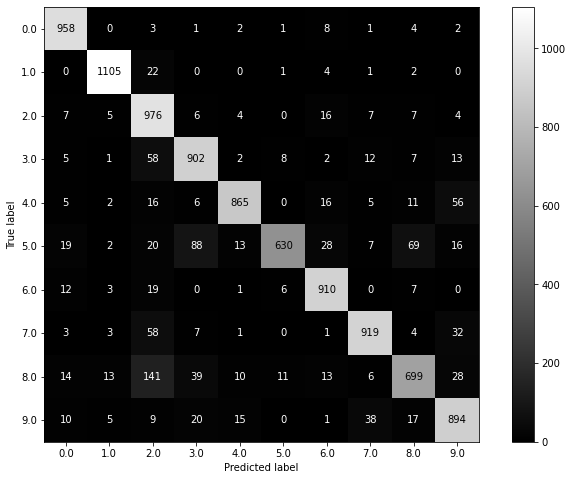

In [149]:
fig, ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(sgd_clf, X_test_s, y_test, ax=ax, cmap=plt.cm.gray)

The main diagonal of the matrix is composed by the instances correctly classified, and as we can see almost all instances are in it. But looking to the values of all elements in the matrix could be a little bit confused, but by the colours we can identify fastly all the digits that classifier identifies worst. For example, we can see that in the row for true values for 8 digit and in the columns for predicted labels for the algoritm for the digit 2, the colour is lighter that the other elements (that aren't in the main diagonal) and if we check the number that is inside we can quantify the times that the classifier was wrong labeling a 2 digit when really is 8 (141), so we can determine that classifiers confuses the 2 label with the 8.